# HW2_1  2 Conv, 1 Max pooling, 2 FC

In [1]:
import torch
import torch.nn as nn 
import torch.optim as optim 

import torchvision.datasets as datasets 
import torchvision.transforms as transforms 

from torch.utils.data import DataLoader 

import numpy as np
import matplotlib.pyplot as plt

In [2]:
CUDA = torch.cuda.is_available()
device = torch.device('cuda:0' if CUDA else 'cpu')
print(CUDA)

True


### batchsize

In [3]:
batch_size = 100


### preprocessing datas

In [4]:
mnist_train = datasets.MNIST(root="./Data/", train=True, transform=transforms.ToTensor(), target_transform=None, download=True)
mnist_test = datasets.MNIST(root="./Data/", train=False, transform=transforms.ToTensor(), target_transform=None, download=True)

In [5]:
train_loader = DataLoader(mnist_train, batch_size=batch_size)#, shuffle=True, num_workers=2, drop_last=True)
test_loader = DataLoader(mnist_test, batch_size=batch_size)#, shuffle=False, num_workers=2, drop_last=True)

# Model1.
## 2 Conv, 1 Max pooling, 2 FC

In [6]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.layer1=nn.Sequential(
            nn.Conv2d(1,32,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
        )
        self.layer2=nn.Sequential(
            nn.Conv2d(32,64,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2)
        )
        self.fc=nn.Sequential(
            nn.Linear(14*14*64,64),
            nn.ReLU(),
            nn.Linear(64,10)
        )

       
        
    def forward(self,x):
        out=self.layer1(x)
        out=self.layer2(out)
        out=out.reshape(out.size(0),-1)
        out=self.fc(out)
        return nn.functional.log_softmax(out,dim=1)

In [7]:
model=CNN().to(device)
criterion=torch.nn.NLLLoss().to(device)
optimizer=torch.optim.Adam(model.parameters())

In [8]:
total_batch = len(train_loader)


### Train and Test

In [9]:
lossrates=[]
accuracy=[]

with torch.no_grad():
    correct=0
    total=0
    for X,Y in test_loader:
        X = X.to(device)
        Y = Y.to(device)
        out=model(X)
        _,pred=torch.max(out,1)
        total+=Y.size(0)
        correct+=(pred==Y).sum().item()
    print('acc:',correct/total)
    
    totloss=0

for epoch in range(30):
    totloss=0

    for X, Y in train_loader: 
        X = X.to(device)
        Y = Y.to(device)

        
        hypothesis = model(X)
        loss = criterion(hypothesis, Y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        totloss+=loss.item()
    totloss/=total_batch
    lossrates.append(totloss)
    
    
    correct=0
    total=0

   
    
    with torch.no_grad():
       
        for X,Y in test_loader:
            X = X.to(device)
            Y = Y.to(device)
            out=model(X)
            _,pred=torch.max(out,1)
            total+=Y.size(0)
            correct+=(pred==Y).sum().item()
        
        accuracy.append(correct/total) 
    
    

   

acc: 0.101


In [10]:
aa=np.array(range(1,31))
aa


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

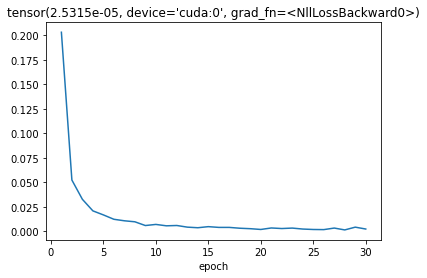

In [11]:
plt.plot(aa,lossrates)


plt.title(loss)

plt.xlabel('epoch')

plt.show()

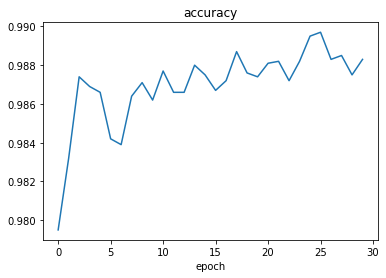

In [12]:
plt.plot(accuracy)

plt.title('accuracy')

plt.xlabel('epoch')

plt.show()

In [13]:
torch.save(model, 'model1.pt')

In [14]:
print(accuracy[-1])

0.9883


In [15]:
print("finalLoss:",lossrates[-1])
print("finalAcc:",accuracy[-1])

finalLoss: 0.002287859318802213
finalAcc: 0.9883


# Model 2.
## 5 Conv, 1 Max pooling, 2 FC

In [16]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.layer1=nn.Sequential(
            nn.Conv2d(1,8,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.Conv2d(8,16,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2)
         
        )
        self.layer2=nn.Sequential(
            nn.Conv2d(16,32,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.Conv2d(32,64,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2)
        )
        self.fc=nn.Sequential(
            nn.Linear(7*7*64,64),
            nn.ReLU(),
            nn.Linear(64,10)
        )

       
        
    def forward(self,x):
        out=self.layer1(x)
        out=self.layer2(out)
        out=out.reshape(out.size(0),-1)
        out=self.fc(out)
        return nn.functional.log_softmax(out,dim=1)

In [17]:
model=CNN().to(device)
criterion=torch.nn.NLLLoss().to(device)
optimizer=torch.optim.Adam(model.parameters())
total_batch = len(train_loader)


In [18]:
lossrates=[]
accuracy=[]

with torch.no_grad():
    correct=0
    total=0
    for X,Y in test_loader:
        X = X.to(device)
        Y = Y.to(device)
        out=model(X)
        _,pred=torch.max(out,1)
        total+=Y.size(0)
        correct+=(pred==Y).sum().item()
    print('acc:',correct/total)
    
    totloss=0

for epoch in range(30):
    totloss=0

    for X, Y in train_loader: 
        X = X.to(device)
        Y = Y.to(device)

        
        hypothesis = model(X)
        loss = criterion(hypothesis, Y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        totloss+=loss.item()
    totloss/=total_batch
    lossrates.append(totloss)
    
    
    correct=0
    total=0


    
    with torch.no_grad():
       
        for X,Y in test_loader:
            X = X.to(device)
            Y = Y.to(device)
            out=model(X)
            _,pred=torch.max(out,1)
            total+=Y.size(0)
            correct+=(pred==Y).sum().item()

        accuracy.append(correct/total) 
    
    

   

acc: 0.1031


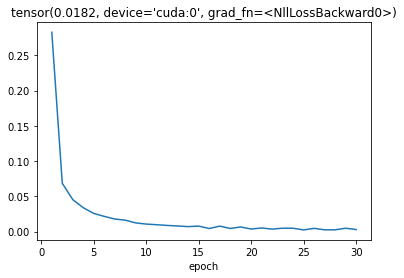

In [19]:
aa=np.array(range(1,31))
aa

plt.plot(aa,lossrates)

plt.title(loss)

plt.xlabel('epoch')

plt.show()

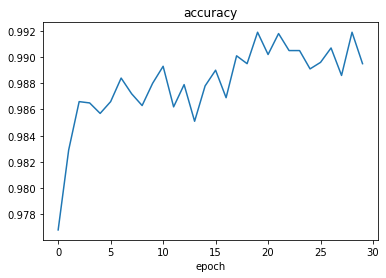

In [20]:
plt.plot(accuracy)

plt.title('accuracy')

plt.xlabel('epoch')

plt.show()

In [21]:
torch.save(model, 'model2.pt')
print("finalLoss:",lossrates[-1])
print("finalAcc:",accuracy[-1])

finalLoss: 0.0028479131886414498
finalAcc: 0.9895


# Model 3.
## 5 Conv, 1 Max pooling, 2 FC

In [22]:


class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.layer1=nn.Sequential(
            nn.Conv2d(1,32,kernel_size=3,stride=1,padding=1)
        )
        self.relu = nn.ReLU()

        self.residual_block=nn.Sequential(
            nn.Conv2d( 32,32,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.Conv2d( 32,32,kernel_size=3,stride=1,padding=1)    
        )
        self.maxPool=nn.MaxPool2d(kernel_size=2,stride=2)
        self.fc=nn.Sequential(
            nn.Linear(14*14*32,64),
            nn.ReLU(),
            nn.Linear(64,10)
        )
    def forward(self,x):
        out=self.layer1(x)
        out=self.relu(out)
        out=self.residual_block(out)+out
        out=self.relu(out)
        out=self.residual_block(out)+out
        out=self.relu(out)
        out=self.maxPool(out)
        out=out.reshape(out.size(0),-1)
        out=self.fc(out)
        return nn.functional.log_softmax(out,dim=1)

In [23]:
model=CNN().to(device)
criterion=torch.nn.NLLLoss().to(device)
optimizer=torch.optim.Adam(model.parameters())
total_batch = len(train_loader)

In [24]:
lossrates=[]
accuracy=[]

with torch.no_grad():
    correct=0
    total=0
    for X,Y in test_loader:
        X = X.to(device)
        Y = Y.to(device)
        out=model(X)
        _,pred=torch.max(out,1)
        total+=Y.size(0)
        correct+=(pred==Y).sum().item()
    print('acc:',correct/total)
    
    totloss=0

for epoch in range(30):
    totloss=0

    for X, Y in train_loader: 
        X = X.to(device)
        Y = Y.to(device)

        
        hypothesis = model(X)
        loss = criterion(hypothesis, Y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        totloss+=loss.item()
    totloss/=total_batch
    lossrates.append(totloss)
    
    
    correct=0
    total=0


    
    with torch.no_grad():
       
        for X,Y in test_loader:
            X = X.to(device)
            Y = Y.to(device)
            out=model(X)
            _,pred=torch.max(out,1)
            total+=Y.size(0)
            correct+=(pred==Y).sum().item()

        accuracy.append(correct/total) 
    
    

   

acc: 0.1137


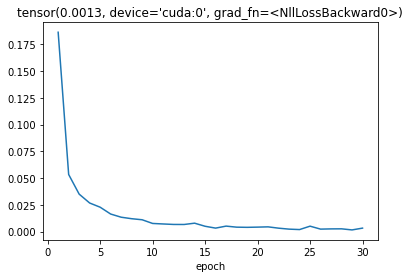

In [25]:
aa=np.array(range(1,31))
aa

plt.plot(aa,lossrates)

plt.title(loss)

plt.xlabel('epoch')

plt.show()

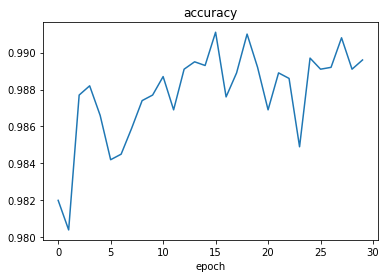

In [26]:
plt.plot(accuracy)

plt.title('accuracy')

plt.xlabel('epoch')

plt.show()

In [27]:
torch.save(model, 'model3.pt')

In [28]:
print("finalLoss:",lossrates[-1])
print("finalAcc:",accuracy[-1])

finalLoss: 0.003242420163569332
finalAcc: 0.9896
